In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import os
from IPython.display import Image

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [0]:
!pip install tensorboardX

    100% |████████████████████████████████| 133kB 3.4MB/s 


# Part 0 : Introduction to RNN and GRU

 The main limitations of Feed Forward Neural Networks (and also Convolutional Networks) are:
  
  * They accept a fixed-sized vector as input (e.g. an image) and produce a fixed-sized vector as output (e.g. probabilities of different classes). 
  
  * These models perform this mapping using a fixed amount of computational steps (e.g. the number of layers in the model, number of neurons per layer). 
  
 Feedforward networks are amnesiacs regarding their recent past; they remember nostalgically only the formative moments of training.

 <img src="img/RNN3.png" />

Recurrent networks, on the other hand, take as their input not just the current input example they see, but also what they have perceived previously in time. 

For example, when we say a person is haunted by their deeds, we are simply talking about the consequences that past outputs wreak on present time. The French call this “Le passé qui ne passe pas,” or “The past that does not pass away.”

The decision a recurrent net reached at time step t-1 affects the decision it will reach one moment later at time step t. So recurrent networks have two sources of input, the present and the recent past. It is often said that recurrent networks have memory which allows them to perform tasks that feedforward networks can’t.
  
Mathematically, recurrent neural net can be written as:  

$H_t = \sigma(U*X_t + W*H_{t-1})$
$y_t = \sigma(V*H_{t-1})$

U: weight vector associated to the $x_t$

W:  weight vector associated to the  hidden layer

V: weight vector associated to the output layer

The hidden state at time step t is h_t. It is a function of the input at the same time step $x_t$ and  the hidden state of the previous time step $ h_{t-1}$ The function  $\phi$ can be the sigmoid function($\sigma$) or tangent hyperbolic($tanh$)

$y_t$ represente the output at time step t

###  Limitations of RNN:

During back propagation, recurrent neural networks suffer from the vanishing  gradient problem which means when updating the model parameters the gradient can goes to zeros.

more about backpropagation and vanishing gradient: http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/,  https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257


### GRU

GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network. 

To solve that problem , GRU uses, so called, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output.

## Update Gate:

$z_t = \sigma(W^{(z)}x_t + U^{(z)}h_{t-1})$

$x_t$:  current input

$W^{(z)}$ : weight associated to $x_t$

$h_{t-1}$ : output of the previous unit

$U^{(z)}$: weight associated to $h_{t-1}$

The update gate helps the model to determine how much of the past information  needs to be passed along to the future. 
Suppose we have: 
### 'Hello, my name is Jean  and I'm from France. I speak....'

To predict the next word we don't need to remember all the previous part. We can just use 'I'm from France' to now that the word to predict is 'French'. That's exactly what the update gate does, it allow the network to jus remember the usefull part to predict the next output.

That allows the model to decide to copy all the information from the past and eliminate the risk of vanishing gradient problem

## Reset Gate:

$r_t = \sigma(W^{(r)}x_t + U^{(r)}h_{t-1})$

this gate is used from the model to decide how much of the past information to forget. The difference  between Update Gate and Reset Gate comes in the weights and the gate’s usage.

Coming back to the example above the reset gate tell to the model you don't need to remember  'Hello, my name is Jean  and' to predict the next word.

## Current memory content

This will use the reset gate to store the relevant information from the past.

$h_{t}^{\prime} = \tanh(Wx_t +r_t ⊙  Uh_{t-1})$ 

$r_t ⊙  Uh_{t-1} $:  Hadamard (element-wise) product between the reset gate $r_t$ and $Uh_{t-1}$. That will determine what to remove from the previous time steps

$\tanh$: nonlinear activation function

## Final memory at current time step:

In this step the update gate is used.  It determines what to collect from the current memory content  $h_{t}^{\prime}$ and what from the previous steps  $ h_{t-1}$

$h_t = z_t  ⊙ h_{t-1} + (1-z_t)  ⊙ h_{t}^{\prime}$

* Apply element-wise multiplication to the update gate $z_t$ and $h_{t-1}$.
* Apply element-wise multiplication to $(1-z_t) $and $h_{t}^{\prime}$.
* Sum the two results 


Putting all in a graph GRU looks like the schema below:

 <img src="img/GRU1.png" />


more details [towardsdatascience](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be), [medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9), [karpathy blog](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

more references:

https://skymind.ai/wiki/lstm

https://medium.com/@carynmccarthy15/a-beginners-guide-to-recurrent-neural-networks-bfacb27bddb6

https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9

https://medium.com/@camrongodbout/recurrent-neural-networks-for-beginners-7aca4e933b82

http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/

https://towardsdatascience.com/what-is-a-recurrent-nns-and-gated-recurrent-unit-grus-ea71d2a05a69



# Part 2 : Question Answering with ParlAI

# Introduction to Question Answering 

Search engines like Google and Yahoo! that allow the users to search for documents on the World
Wide Web. In Search engines the user has to check each and every document to get useful answer to the
question and it is a time consuming process. **The Question Answering (QA) system** reduces the search time toget exact answer to the question. Question Answering system is an important research area in information
retrieval. Research on the area of Question Answering system started in the year 1960 and present lot of
Question Answering systems have been developed. Question Answering system combines the research from
different domains like Natural Language Processing, Artificial Intelligence, Information Retrieval and
Information extraction.

**The objective** of question answering system is to find exact answer to the question asked
by user in natural language

To understand the Question Answering subject, we firstly define the associated terms. 

*   **A Question Phrase** is the part of the question that says what is searched.
*   ** Question Type**  refers to a categorization of the question for its purpose.
*   ** Answer Type** refers to a class of objects which are sought by the question. 
*    **Question Focus** is the property or entity being searched by the question. 
*   **Question Topic** is the object or event that the question is about. 
*  **Candidate Passage** can broadly be defined as anything from a sentence to a document retrieved by a search engine in response to a question. 
* ** Candidate Answer** is the text ranked according to its suitability to as an answer


But here we are not going to check all this details, in this case we just care about the  passage, question and answer because our data set contain a passages and  each passage is following by question and answer.

Generally, the question answering system can be
classified into two domains:
*  **Closed domain question answering system**

  deals with questions under a specific
domain and can be seen as an easier task because NLP
systems can exploit domain-specific knowledge frequently
formalized in ontologies.  Alternatively, closed-domain might
refer to a situation where only a limited type of questions are
accepted, such as questions asking for descriptive rather
than procedural information.
* ** Open domain question answering system** 

 It is deals with questions about nearly anything, and
can only rely on general ontologies and world knowledge.

Closed domain question answering system give more exact and correct answer than the open domain question answering system.

# Exampe of Q/A:

* This example from our data set (Babi tasks) which call Three supporting facts that is mean to answer the question we use the first three sentence

**Task 3: Three Supporting Facts **  
John picked up the apple.  
John went to the office.  
John went to the kitchen.  
John dropped the apple.   
Where was the apple before the kitchen?  
**Answer: office**

* Example of two supporting facts, we use the two first sentence to answer the question

**Task 2: Two Supporting Facts**  
John is in the playground.  
John picked up the football.  
Bob went to the kitchen.  
Where is the football?  
**Answer: playground**




## Real application of Question answering

* Question answering use in any website to retrive information as example Google.

* Chatbots is using Q/A to make a conversation between the user and agent.






## References:

1. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=11&cad=rja&uact=8&ved=2ahUKEwit9rWHls_hAhXKz4UKHUvWCscQFjAKegQIAxAB&url=https%3A%2F%2Fwww.researchgate.net%2Fpublication%2F320978810_An_Overview_of_Question_Answering_System&usg=AOvVaw01Y_S9X-3MXMpyrFg8mVqL
2. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=13&cad=rja&uact=8&ved=2ahUKEwit9rWHls_hAhXKz4UKHUvWCscQFjAMegQIAhAB&url=https%3A%2F%2Fwww.ncbi.nlm.nih.gov%2Fpmc%2Farticles%2FPMC3825096%2F&usg=AOvVaw04BMj_m3ELsoau6ylXl6Pn


### ParlAI
[ParlAI](https://github.com/facebookresearch/ParlAI/blob/master/README.md) (pronounced “par-lay”) is a framework for dialogue AI research, implemented in Python.

Its goal is to provide researchers:

* a unified framework for sharing, training and testing dialogue models
* many popular datasets available all in one place -- from open-domain chitchat to visual question answering.
* a wide set of reference models -- from retrieval baselines to Transformers.
* seamless integration of Amazon Mechanical Turk for data collection and human evaluation
* integration with Facebook Messenger to connect agents with humans in a chat interface

Documentation can be found [here](http://www.parl.ai/static/docs/), some of this tutorial is inspired from the ParlAI documentation so feel free to go back and forth between the notebook and the documentation.


### Setup the notebook
If using google colab, make sure to use TPU runtime by going to ***Runtime > Change runtime type > Hardware accelerator: TPU > Save***

### Install ParlAI

Start by installing ParlAI from github. The ParlAI folder will be located in the home directory at `~/ParlAI/`.  
*Note: In a jupyter notebook, you can run arbitrary bash commands by prefixing them with a question mark, example: `!echo "Hello World"`*

In [0]:
# Remove `> /dev/null` to see the output of commands
!rm -fr ~/ParlAI
!git clone https://github.com/facebookresearch/ParlAI.git ~/ParlAI  > /dev/null
!cd ~/ParlAI; python setup.py develop > /dev/null

Cloning into '/root/ParlAI'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 21065 (delta 21), reused 10 (delta 8), pack-reused 21025
Receiving objects: 100% (21065/21065), 17.71 MiB | 30.58 MiB/s, done.
Resolving deltas: 100% (14663/14663), done.
zip_safe flag not set; analyzing archive contents...


Most of the scripts that we will use in ParlAI are located in the ~/ParlAI/examples directory.
Let's have a first glance at the scripts available, we will come back to them later:

In [0]:
!ls ~/ParlAI/examples/   ## all the scripts or files that we have

base_train.py	       eval_model.py		 remote.py
build_dict.py	       extract_image_feature.py  seq2seq_train_babi.py
build_pytorch_data.py  interactive.py		 train_model.py
display_data.py        profile_train.py
display_model.py       README.md


## 1. Exploring the data

**First** we need to download the data, we will use the `build_dict.py` as a dummy task to download the data.

In [0]:
# Download the data silently
!python ~/ParlAI/examples/build_dict.py --task babi:task1k:1 --dict-file /tmp/babi1.dict > /dev/null
# Print a few examples
!head -n 30 ~/ParlAI/data/bAbI/tasks_1-20_v1-2/en-valid-10k-nosf/qa1_train.txt

Building dictionary: 100% 900/900 [00:00<00:00, 17.9kex/s]
1 Mary moved to the bathroom.
2 John went to the hallway.
3 Where is Mary? 	bathroom
4 Daniel went back to the hallway.
5 Sandra moved to the garden.
6 Where is Daniel? 	hallway
7 John moved to the office.
8 Sandra journeyed to the bathroom.
9 Where is Daniel? 	hallway
10 Mary moved to the hallway.
11 Daniel travelled to the office.
12 Where is Daniel? 	office
13 John went back to the garden.
14 John moved to the bedroom.
15 Where is Sandra? 	bathroom
1 Mary went to the bedroom.
2 John journeyed to the bathroom.
3 Where is John? 	bathroom
4 Sandra journeyed to the hallway.
5 John journeyed to the garden.
6 Where is Mary? 	bedroom
7 John journeyed to the bathroom.
8 Sandra journeyed to the garden.
9 Where is John? 	bathroom
10 Sandra went back to the bedroom.
11 Daniel travelled to the bathroom.
12 Where is John? 	bathroom
13 John went to the office.
14 Mary moved to the office.
15 Where is Sandra? 	bedroom


The bAbI tasks were downloaded in `~/ParlAI/data/bAbI/tasks_1-20_v1-2/en-valid-nosf/`

In bAbI the data is organised as follows:
- **Dialog turn**: A dialog turn is a single utterance / statement. Each line in the file corresponds to one dialog turn.   
  Example: *"John went to the office."*
- **Sample (question)**: Every few dialog turns, a question can be asked that the model has to answer, this consitute a sample.  The question is followed by its ground truth answer, separated by a tab.
  Example: *"Where is John? `<tab>` bathroom"*
- **Episode**: a sequence of ordered coherent dialog turns that are related to each other form an episode. Each new episode is independant of the others. Each line starts with the dialog turn number in the current episode.



## 3. Baseline

We now have a clearer idea of the data distribution and the metrics that we can use.  
The next step is to start solving the tasks with a simple baseline. This will allow us to compare more elaborate models agains this baseline.  
Here are a few classical baselines:
- **Random model**: The model answers randomly among the set of possible answers for each question
-  **Majority class**: The model always answers with the most frequent answer in the training set (majority class)

We are going to reimplement these own baselines.  
Implementing a new model in ParlAI is detailed in the [tutorial](http://parl.ai/static/docs/seq2seq_tutorial.html) but for our simple baselines, we will only need to inherit the [Agent](https://github.com/facebookresearch/ParlAI/blob/6d246842d3f4e941dd3806f3d9fa62f607d48f59/parlai/core/agents.py#L50) class and override the `act()` method.

---


---

*Note: the `%%writefile` magic command in jupyter writes the content of the cell to a file at the given path.*

In [0]:
!mkdir -p ~/ParlAI/parlai/agents/baseline/  ## create a folder to store our baseline files
!touch ~/ParlAI/parlai/agents/baseline/random.py ## create the random baseline file
!touch ~/ParlAI/parlai/agents/baseline/majorityclass.py ## create the majority baseline file

!mkdir -p ~/ParlAI/parlai/agents/rnn_model/    ## create a folder to store rnn model
!touch ~/ParlAI/parlai/agents/rnn_model/rnn_model.py ## create rnn model file

In the next cell we are going to create the random baseline which consist to pick an answer randomly from all the candidates answer

In [0]:
%%writefile ~/ParlAI/parlai/agents/baseline/random.py
import random

from parlai.core.torch_agent import Agent   ## import the Agent model where our baseline will inherit


class RandomAgent(Agent):
  
    def act(self):
        if 'label_candidates' not in self.observation:   ## check if the attribute label_candidates is part of oservation if not we will not do anything
            return
        candidates = list(self.observation['label_candidates'])  ## the cadidates answer
        reply = {'text': candidates[random.randrange(len(candidates))]} ## choose randomly one of the candidate answer
        return reply  ## and return the choosen answer

Overwriting /root/ParlAI/parlai/agents/baseline/random.py


In [0]:
!python ~/ParlAI/examples/eval_model.py -t babi:task10k:1 -m baseline/random | grep accuracy     ##run the random baseline and check the accuracy of that baseline

In [0]:
!python ~/ParlAI/examples/display_model.py -t babi:task10k:1 -m baseline/random -n 10   ## look at the first 10 examples

[ optional arguments: ] 
[  display_ignore_fields:  ]
[  num_examples: 10 ]
[ Main ParlAI Arguments: ] 
[  batchsize: 1 ]
[  datapath: /root/ParlAI/data ]
[  datatype: valid ]
[  download_path: /root/ParlAI/downloads ]
[  hide_labels: False ]
[  image_mode: raw ]
[  multitask_weights: [1] ]
[  numthreads: 1 ]
[  show_advanced_args: False ]
[  task: babi:task10k:1 ]
[ ParlAI Model Arguments: ] 
[  dict_class: None ]
[  init_model: None ]
[  model: baseline/random ]
[  model_file: None ]
[ ParlAI Image Preprocessing Arguments: ] 
[  image_cropsize: 224 ]
[  image_size: 256 ]
[creating task(s): babi:task10k:1]
[loading fbdialog data:/root/ParlAI/data/bAbI/tasks_1-20_v1-2/en-valid-10k-nosf/qa1_valid.txt]
[babi:task10k:1]: Sandra travelled to the office.
Sandra went to the bathroom.
Where is Sandra?
[label_candidates: garden|bedroom|bathroom|office|hallway|...and 1 more]
[eval_labels: bathroom]
   kitchen
~~
[babi:task10k:1]: Mary went to the bedroom.
Daniel moved to the hallway.
Where is S

In [0]:
%%writefile ~/ParlAI/parlai/agents/baseline/majorityclass.py
import random

from parlai.core.torch_agent import Agent


class MajorityclassAgent(Agent):
  
    def act(self):
        # From the previous answers:
        # Possible answers: Counter({'bathroom': 1564, 'hallway': 1517, 'garden': 1508, 'bedroom': 1473, 'kitchen': 1471, 'office': 1467}) (6)
        # So the most common answer is 'bathroom'
        reply = {'text': 'bathroom'}
        return reply

Overwriting /root/ParlAI/parlai/agents/baseline/majorityclass.py


In [0]:
!python ~/ParlAI/examples/eval_model.py -t babi:task10k:1 -m baseline/majorityclass | grep accuracy  ##run the majority baseline and check the accuracy

{'exs': 1000, 'accuracy': 0.169, 'f1': 0.169, 'bleu': 1.69e-10}


In [0]:
!python ~/ParlAI/examples/display_model.py -t babi:task10k:1 -m baseline/majorityclass -n 10 ## Print the first top 10 examples

[ optional arguments: ] 
[  display_ignore_fields:  ]
[  num_examples: 10 ]
[ Main ParlAI Arguments: ] 
[  batchsize: 1 ]
[  datapath: /root/ParlAI/data ]
[  datatype: valid ]
[  download_path: /root/ParlAI/downloads ]
[  hide_labels: False ]
[  image_mode: raw ]
[  multitask_weights: [1] ]
[  numthreads: 1 ]
[  show_advanced_args: False ]
[  task: babi:task10k:1 ]
[ ParlAI Model Arguments: ] 
[  dict_class: None ]
[  init_model: None ]
[  model: baseline/majorityclass ]
[  model_file: None ]
[ ParlAI Image Preprocessing Arguments: ] 
[  image_cropsize: 224 ]
[  image_size: 256 ]
[creating task(s): babi:task10k:1]
[loading fbdialog data:/root/ParlAI/data/bAbI/tasks_1-20_v1-2/en-valid-10k-nosf/qa1_valid.txt]
[babi:task10k:1]: Sandra travelled to the office.
Sandra went to the bathroom.
Where is Sandra?
[eval_labels: bathroom]
[label_candidates: bedroom|kitchen|office|garden|hallway|...and 1 more]
   bathroom
~~
[babi:task10k:1]: Mary went to the bedroom.
Daniel moved to the hallway.
Whe

### Intilaize 

In [0]:

%%writefile ~/ParlAI/parlai/agents/rnn_model/rnn_model.py
##import parlai and pytorch
from parlai.core.torch_agent import TorchAgent, Output
from parlai.core.utils import padded_3d
from parlai.core.logs import TensorboardLogger

import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from tensorboardX import SummaryWriter

losses = []
##define the model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size ## input of the model: number of characters in our dictionary
        self.hidden_size = hidden_size ## number of neurons per layers
        self.output_size = output_size ## output size of the model: number of charaters in the output
        self.n_layers = n_layers  ## number of layers of the model
        
        self.encoder = nn.Embedding(input_size, hidden_size)## map a characters to a fixed size of vector (for characters embeddings)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers) ## define the GRU part:it takes asinput the embedding vectors from the encoder
        self.decoder = nn.Linear(hidden_size, output_size) ## decode the vectors output of the GRU to characters 
    
    def forward(self, input, hidden): 
        input = self.encoder(input)
        output, hidden = self.gru(input, hidden)
        output = self.decoder(output)
        output = F.log_softmax(output, dim=1)
        return output, hidden

    def init_hidden(self, batch_size=32):
        return Variable(torch.zeros(self.n_layers, batch_size, self.hidden_size)) ##initialize all the hidden state to zero

class RnnModelAgent(TorchAgent):
    
    @staticmethod    
    def add_cmdline_args(argparser):  ## to allow to run the model on command line
        agent = argparser.add_argument_group("Simple RNN Arguments")
        
        agent.add_argument("-hs", "--hidden-size", type=int, default=128, help="Size of the hidden layer(s) of the RNN")
        agent.add_argument("-nl", "--num-layers", type=int, default=1, help="Number of layers of the RNN")
        
        TorchAgent.add_cmdline_args(argparser)
        RnnModelAgent.dictionary_class().add_cmdline_args(argparser)
        
        return agent
    
    def __init__(self, opt, shared=None):
        
        super().__init__(opt, shared)
        
        if opt['tensorboard_log'] is True:
            self.writer = TensorboardLogger(opt)
        
        self.dictionnary_size = 26      ## we suppose that our dictionary contain the 26 characters of the alphabet
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
        self.use_cuda = True if torch.cuda.is_available() else False
        self.embedding_dim = opt["hidden_size"]  ##the dimension of our embemding vector after transforming the character to a vector
        self.n_layers = opt["num_layers"]  ## number of layer of the network
        self.batch_size = opt["batchsize"]  ## number of examples that we are going to pass as an input at the same time to the network
        self.criterion = nn.NLLLoss()  ### define the loss of our network
        self.decoder = RNN(self.dictionnary_size, self.embedding_dim, self.dictionnary_size, self.n_layers) ## This RNN refer to the previous RNN class
        self.decoder.to(self.device)
        self.model = self.decoder
        
        def weight_init(m):   ##initialisation of the weights of our model using xavier
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data)
        
        self.decoder.apply(weight_init)    #apply the initialized weight to the model
        self.optimizer = optim.Adam(self.decoder.parameters()) ## use Adam optimizer for the model to perform backpropagation(weight updating)
        self.scheduler = None
        self.warmup_scheduler = None
        self.batch_iter = 0

        
        
    def vectorize(self, *args, **kwargs):    ## this function is called by parlai to preprocess text
        """Override options in vectorize from parent."""
        kwargs['add_start'] = False       ##to avoid starting at  the start of sentence
        kwargs['add_end'] = False
        return super().vectorize(*args, **kwargs)
      
    ## the next function allows us to train the model we defined so far
    def train_step(self, batch):  
        
        self.decoder.train()
        
        contexts, answers = batch.text_vec, batch.label_vec # extract the different contexts and answers from the batch input
        
        self.optimizer.zero_grad() ## Since the backward() function accumulates gradients, and we don’t want to mix up gradients between minibatches,
                                   ## we have to zero them out at the start of a new minibatch

        loss = 0
        hidden = self.decoder.init_hidden(self.batch_size).to(self.device) ## initialize the hidden state to zero by calling the previous init_hidden function

        output, hidden = self.decoder(contexts.t(), hidden) 
        output = output.transpose(0,1)[:,-1,:]              ## to get sequence leng, batch, dimension
        loss += self.criterion(output.squeeze(1), answers.squeeze(1)) ## compute the loss by comparing the output of our model and the true answer
            
        
        pred = output.argmax(dim=1)  ## get the predicted answer of our model: it appear at the index which has the bigger value of probbility
        
        losses.append(loss.item())  ## accumulate the loss
         
        loss.backward() ## backpropagate the loss to update the parameters of the model
        self.optimizer.step()  #specify that we finish with one step optimization 
        
        self.batch_iter+= 1 ## next iteration
        
        return Output(self.dict.vec2txt(pred).split(" ")) # convert the vector output to text and return it
    
    def eval_step(self, batch): #after training the model we need to evaluate it in order to measure its performance
        contexts = batch.text_vec ## in the evaluation case we don't have acces to an asnwer, the only thing we have is the question
        
        hidden = self.decoder.init_hidden(contexts.shape[0]).to(self.device) ## as usually we initialize the hidden state

        output, hidden = self.decoder(contexts.t(), hidden)  # compute the output of the model on unseen data
        output = output.transpose(0,1)[:,-1,:]    ## to get sequence leng, batch, dimension
            
        
        pred = output.argmax(dim=1)  # get the predicte
        
        return Output(self.dict.vec2txt(pred).split(" "))
    
    

Overwriting /root/ParlAI/parlai/agents/rnn_model/rnn_model.py


In [0]:
#!rm -fr /tmp/*
!ls /tmp/

babi1.dict	   model2.opt	      my_rnn_model.dict.opt
babi1.dict.opt	   model2.test	      my_rnn_model.opt
model2		   model2.trainstats  my_rnn_model.test
model2.best_valid  model2.valid       my_rnn_model.trainstats
model2.dict	   my_rnn_model       my_rnn_model.valid
model2.dict.opt    my_rnn_model.dict


In [0]:
!rm -fr /tmp/my_rnn_model*
!python ~/ParlAI/examples/train_model.py -t babi:task10k:1 -bs 32 -eps 10 -m rnn_model -mf /tmp/my_rnn_model

[ Main ParlAI Arguments: ] 
[  batchsize: 32 ]
[  datapath: /root/ParlAI/data ]
[  datatype: train ]
[  download_path: /root/ParlAI/downloads ]
[  hide_labels: False ]
[  image_mode: raw ]
[  multitask_weights: [1] ]
[  numthreads: 1 ]
[  show_advanced_args: False ]
[  task: babi:task10k:1 ]
[ ParlAI Model Arguments: ] 
[  dict_class: parlai.core.dict:DictionaryAgent ]
[  init_model: None ]
[  model: rnn_model ]
[  model_file: /tmp/my_rnn_model ]
[ Training Loop Arguments: ] 
[  dict_build_first: True ]
[  display_examples: False ]
[  eval_batchsize: None ]
[  evaltask: None ]
[  load_from_checkpoint: False ]
[  max_train_time: -1 ]
[  num_epochs: 10.0 ]
[  save_after_valid: False ]
[  save_every_n_secs: -1 ]
[  short_final_eval: False ]
[  validation_cutoff: 1.0 ]
[  validation_every_n_epochs: -1 ]
[  validation_every_n_secs: -1 ]
[  validation_max_exs: -1 ]
[  validation_metric: accuracy ]
[  validation_metric_mode: None ]
[  validation_patience: 10 ]
[  validation_share_agent: False

In [0]:
!python ~/ParlAI/examples/eval_model.py -mf /tmp/my_rnn_model -t babi:task10k:1 -dt valid

[ warning: overriding opt['datatype'] to valid (previously: train )]
Dictionary: loading dictionary from /tmp/my_rnn_model.dict
[ num words =  26 ]
[ Using CUDA ]
[creating task(s): babi:task10k:1]
[loading fbdialog data:/root/ParlAI/data/bAbI/tasks_1-20_v1-2/en-valid-10k-nosf/qa1_valid.txt]
[ optional arguments: ] 
[  display_examples: False ]
[  log_every_n_secs: 2 ]
[  metrics: all ]
[  num_examples: -1 ]
[ Main ParlAI Arguments: ] 
[  batchsize: 32 ]
[  datapath: /root/ParlAI/data ]
[  datatype: valid ]
[  download_path: /root/ParlAI/downloads ]
[  hide_labels: False ]
[  image_mode: raw ]
[  multitask_weights: [1] ]
[  numthreads: 1 ]
[  show_advanced_args: False ]
[  task: babi:task10k:1 ]
[ ParlAI Model Arguments: ] 
[  dict_class: parlai.core.dict:DictionaryAgent ]
[  init_model: None ]
[  model: rnn_model ]
[  model_file: /tmp/my_rnn_model ]
[ PytorchData Arguments: ] 
[  batch_length_range: 5 ]
[  batch_sort_cache_type: pop ]
[  batch_sort_field: text ]
[  numworkers: 4 ]
[  

In [0]:
!python ~/ParlAI/examples/interactive.py -mf /tmp/my_rnn_model

[ optional arguments: ] 
[  display_examples: False ]
[  display_ignore_fields: label_candidates,text_candidates ]
[  display_prettify: False ]
[ Main ParlAI Arguments: ] 
[  batchsize: 1 ]
[  datapath: /root/ParlAI/data ]
[  datatype: train ]
[  download_path: /root/ParlAI/downloads ]
[  hide_labels: False ]
[  image_mode: raw ]
[  multitask_weights: [1] ]
[  numthreads: 1 ]
[  show_advanced_args: False ]
[  task: None ]
[ ParlAI Model Arguments: ] 
[  dict_class: parlai.core.dict:DictionaryAgent ]
[  init_model: None ]
[  model: None ]
[  model_file: /tmp/my_rnn_model ]
[ Local Human Arguments: ] 
[  local_human_candidates_file: None ]
[  single_turn: False ]
[ ParlAI Image Preprocessing Arguments: ] 
[  image_cropsize: 224 ]
[  image_size: 256 ]
[ Simple RNN Arguments: ] 
[  hidden_size: 128 ]
[  num_layers: 1 ]
[ TorchAgent Arguments: ] 
[  add_p1_after_newln: False ]
[  betas: (0.9, 0.999) ]
[  delimiter: 
 ]
[  embedding_projection: random ]
[  embedding_type: random ]
[  fp16: F

# Part 2 (Optional) : Language Modeling

In [0]:
!wget https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
!ls

--2019-04-13 11:54:24--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt’

shakespeare_input.t 100%[===================>]   4.36M  7.59MB/s    in 0.6s    

2019-04-13 11:54:25 (7.59 MB/s) - ‘shakespeare_input.txt’ saved [4573338/4573338]

sample_data  shakespeare_input.txt


In [0]:
!pip install unidecode

    100% |████████████████████████████████| 245kB 6.4MB/s 


In [0]:
import unidecode
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('shakespeare_input.txt').read())
file_len = len(file)
print('file_len =', file_len)
print("n_characters : ", n_characters)

file_len = 4573338
n_characters :  100


In [0]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

ysician;
His antidotes are poison, and he slays
Moe than you rob: take wealth and lives together;
Do villany, do, since you protest to do't,
Like workmen. I'll example you with thievery.
The sun's a th


In [0]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        output = F.log_softmax(output, dim=1)
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))


In [0]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [0]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [0]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden().to(device)
    prime_input = char_tensor(prime_str).to(device)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1].to(device)    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char).to(device)

    return predicted

In [0]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [0]:
def train(inp, target):
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].reshape(-1))

    loss.backward()
    decoder_optimizer.step()

    return loss.data / chunk_len

In [0]:
n_epochs = 10000
print_every = 100
plot_every = 10
hidden_size = 128
n_layers = 3
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder.to(device)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.NLLLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
  inputs, labels = random_training_set()
  inputs, labels = inputs.to(device), labels.to(device)
  loss = train(inputs, labels)       
  loss_avg += loss

  if epoch % print_every == 0:
    print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
    print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
    all_losses.append(loss_avg / plot_every)
    loss_avg = 0

 34s (100 1%) 2.4968]
Whean
Beusn,
Thum heroy nerekal bann thoun mereanswivhalet can coursde thinnd sit fhabs won! me bnin!  

 8s (200 2%) 2.3825]
Whams thew the rase thjy mades thesterle nakes waI ciicrucs baves, hy
chest maltes? ath onhs maenild t 

 42s (300 3%) 2.0130]
What, her is the wan wee thee. Sor hofs siive.

FEM:
In to to me it the net to of so in the, epre the  

 17s (400 4%) 2.0316]
Whis sher Anlighth do highitth for teav
That be drake sas mand hin me way a frows teat, the she of war 

 51s (500 5%) 2.3362]
Wher a wave are comzanss.

BFId sarse that haes, doth.

Furrer your mang:
Lathou morks your leark, Fro 

 26s (600 6%) 2.0570]
Whis theed fable sursers of this sorn of to uch
tor ploness thubere
hould for bould worgerarang toor n 



KeyboardInterrupt: ignored

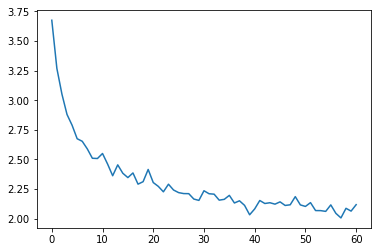

In [0]:
 import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [0]:
print(evaluate('Th', 200, temperature=0.8))

The carses; and vator't,
And it loldine: torile's and him and fortone-doodoss that is
Thou come I trone, and indinderenes hoth porn to arn mine.

ALGUDIMY ONOTE:
Covee plat!

RITO
And to to that my my k


In [0]:
print(evaluate('Th', 200, temperature=0.2))

The mand the mare the mand the mand the rise to songer the come to doth the doth in to songer the the the may the the come to songer the come to songer the the the come.

IOLIO:
I and so so in the mand 


In [0]:
print(evaluate('Th', 200, temperature=1.4))

Thall tade vOnquarge!wo,
Theyousgy. I do qundale, it lither
Dowhcm extaje i greplyall.
Gowoa tal tished isastierim.
'Ote, on tunkerex, s.
It my your, you wrostiever,
And a mist, nless, anl is let'this J
